## Task 1 – Problem Formulation, Data Acquisition and Preparation

In [1]:
#library
import pandas as pd
from pandas import DataFrame
import numpy as np

#import dataframe

adult = 'adult.csv'
adult = pd.read_csv(adult, sep = ',', header = None, names = ['Age','WorkClass',
                                                                   'FinalWeight',
                                                                   'Education',
                                                                   'EduNum',
                                                                   'MaritalStatus',
                                                                   'Occupation',
                                                                   'Relationship',
                                                                   'Race','Sex',
                                                                   'CapitalGain',
                                                                   'CapitalLoss', 
                                                                   'Weekhrs',
                                                                   'NativeCountry',
                                                                   'Salary'])
#Check validaty of data
adult.head(100)
adult.tail(100) 

#WorkClass
adult['WorkClass'].unique() #unique values check
adult['WorkClass'].value_counts() #Checking datatype and count 
adult['WorkClass'] = adult['WorkClass'].str.strip() #Removing all whiteshapes in Workclass
adult['WorkClass'].replace( '?', np.nan, inplace= True)#Unknown value remove by nan
adult['WorkClass'].replace( 'Private', 'private') #fixing typos using replace function
#Grouping Workclass with similar value and replace 
adult['WorkClass'] = adult['WorkClass'].replace(['State-gov','Federal-gov','Local-gov'],'Government')
adult['WorkClass'] = adult['WorkClass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self-Employed')
adult['WorkClass'] = adult['WorkClass'].replace(['Without-pay','Never-worked'],'Unemployed')

#Relationship
adult['Relationship'].unique()#unique values check
adult['Relationship'].value_counts() #Checking datatype and count
adult['Relationship'] = adult['Relationship'].str.strip() #Removing whiteshapes

#MaritalStatus
adult['MaritalStatus'].unique()#unique values check
adult['MaritalStatus'].value_counts()#Checking datatype and count
adult['MaritalStatus'] = adult['MaritalStatus'].str.strip() #Removing all whiteshapes in Marital Status
#Grouping Marital Status with similar value and replace 
adult['MaritalStatus'] = adult['MaritalStatus'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
adult['MaritalStatus'] = adult['MaritalStatus'].replace(['Married-AF-spouse','Married-civ-spouse'],
                                                               'Married')
#Sex
adult['Sex'].unique() #unique values check
adult['Sex'].value_counts() #Checking datatype and count
adult['Sex'] = adult['Sex'].str.strip() #Removing whiteshapes

#Race
adult['Race'].unique() #unique values check
adult['Race'].value_counts() #Checking datatype and count
adult['Race'] = adult['Race'].str.strip() #Removing whiteshapes

#CapitalLoss
adult['CapitalGain'].unique()#unique values check
adult['CapitalGain'].value_counts()#Checking datatype and count
adult.loc[(adult.CapitalLoss > 0) ,'CapitalGain'] =  1 # giving numeric label if is grater than 1
adult.loc[(adult.CapitalLoss == 0) ,'CapitalGain']= 0 #giving numeric label if value is equal to 0


#CapitalLoss
adult['CapitalLoss'].unique()#unique values check
adult['CapitalLoss'].value_counts()#Checking datatype and count
adult.loc[(adult.CapitalLoss > 0) ,'CapitalLoss'] =  1 # giving numeric label if is grater than 1
adult.loc[(adult.CapitalLoss == 0) ,'CapitalLoss']= 0 #giving numeric label if value is equal to 0

#Occupation
adult['Occupation'].unique() #unique values check
adult['Occupation'].value_counts() #Checking datatype and count
adult['Occupation'] = adult['Occupation'].str.strip() #Removing whiteshapes
adult['Occupation'].replace( '?', np.nan, inplace= True) #unknown value replacing


#NativeCountry
adult['NativeCountry'].unique()#unique values check
adult['NativeCountry'].value_counts() #Checking datatype and count
adult['NativeCountry'] = adult['NativeCountry'].str.strip() #Removing whiteshapes
adult['NativeCountry'].replace( '?', np.nan, inplace= True) #unknown value replacing 
#Replacing Countries value with continents
adult['NativeCountry'] = adult['NativeCountry'].replace(['India','Iran','Philippines','Cambodia',
                                                                   'Thailand','Laos','Taiwan','China','Japan',
                                                                   'Vietnam','Hong'],'Asia')

adult['NativeCountry'] = adult['NativeCountry'].replace(['United-States','Cuba','Jamaica','Mexico', 'Puerto-Rico','Honduras',
                                                         'Canada','Columbia','Ecuador','Haiti','Dominican-Republic',
                                                         'El-Salvador','Guatemala','Peru','Outlying-US(Guam-USVI-etc)',
                                                         'Trinadad&Tobago','Nicaragua'],'America')

adult['NativeCountry'] = adult['NativeCountry'].replace(['England','Germany','Poland','Portugal',
                                                                   'France','Italy','Yugoslavia',
                                                                   'Scotland','Greece',
                                                                   'Ireland','Hungary','Holand-Netherlands'],'Europe')
indexCountry = adult[adult['NativeCountry'] == 'South'].index
adult.drop(indexCountry,inplace = True) #Droping Row with invaild name

#Age
adult['Age'].unique() #unique values check
adult['Age'].value_counts() #Checking datatype and count
adult['Age'] = adult['Age'].astype(int) #Converting to Integer data type

#FinalWeight
adult['FinalWeight'].unique() #unique values check
adult['FinalWeight'].value_counts() #Checking datatype and count
adult['FinalWeight'] = adult['FinalWeight'].astype(float) #Converting to float data type

#EduNum
adult['EduNum'].unique() #unique values check
adult['EduNum'].value_counts() #Checking datatype and count
adult['EduNum']= adult['EduNum'].astype(float) #Converting to float data type

#Salary
adult['Salary'].unique() #unique values check
adult['Salary'].value_counts() #Checking counts and the data types of the values
adult['Salary'] = adult['Salary'].str.strip() #Removing whiteshapes
adult['Salary'].replace( '<=50K.', '<=50K', inplace = True) #Removing typos
adult['Salary'].replace( '>50K.', '>50K', inplace = True) #Removing typos
adult['Salary'] = adult['Salary'].map({ "<=50K": 0, ">50K": 1 }) #Changing value salary with numeric value 

#Education
adult['Education'].unique()#unique values check
adult['Education'].value_counts()#Checking datatype and count
adult['Education'] = adult['Education'].str.strip() #Removing whiteshapes

#Grouping Education
adult['Education'] = adult['Education'].replace(['1st-4th','12th','Preschool','HS-grad','10th','5th-6th'
                                                           ,'7th-8th','11th','9th'],'School')
adult['Education'] = adult['Education'].replace(['Some-college','Bachelors','Prof-school','Assoc-voc'
                                                           ,'Assoc-acdm'],'Bachelors')
#WorkingHours
adult['Weekhrs'].unique()#unique values check
adult['Weekhrs'].value_counts() #Checking datatype and count
adult['Weekhrs'] = adult['Weekhrs'].astype(int) #Removing whiteshapes

adult.dropna(inplace = True) #Removing all the NaN values
adult.drop_duplicates(inplace = True) #remove duplicates value

## Task 2 – Data Exploration

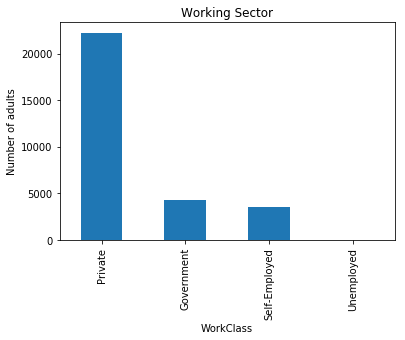

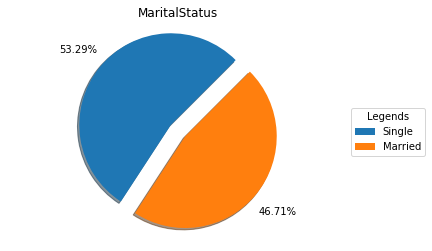

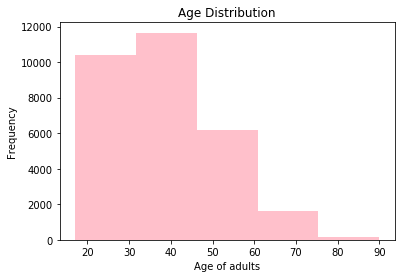

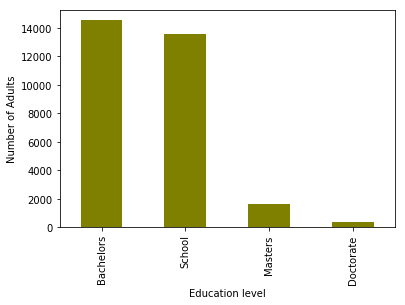

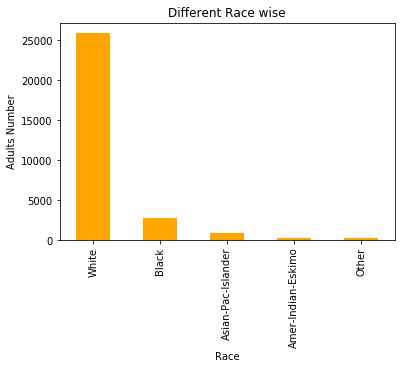

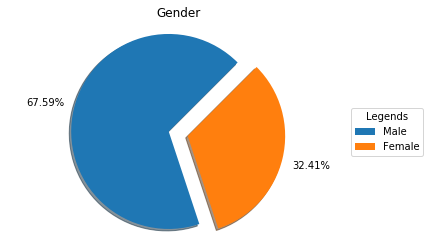

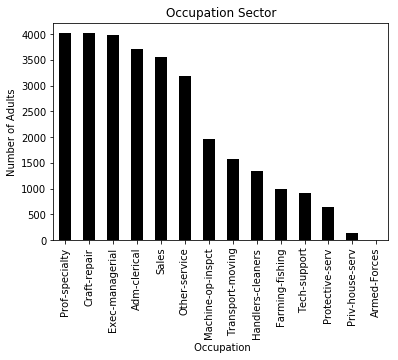

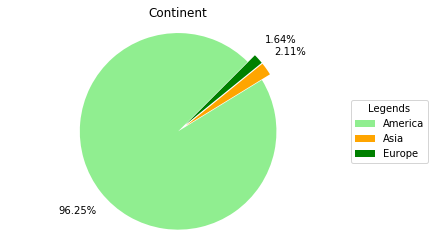

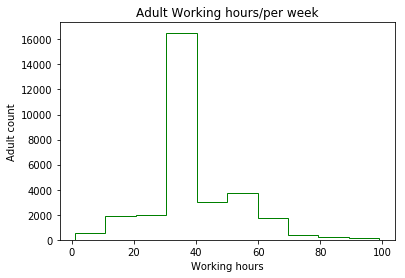

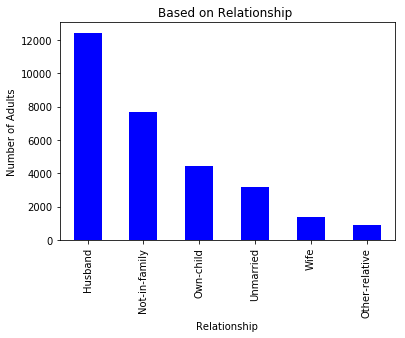

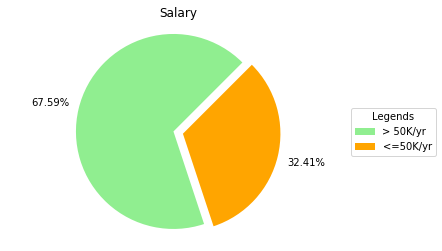

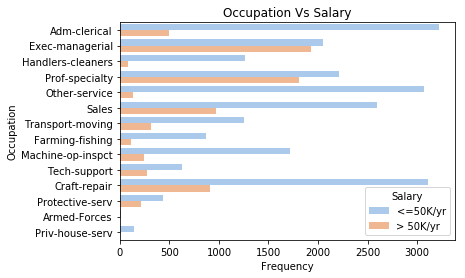

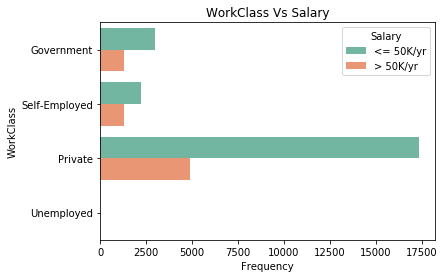

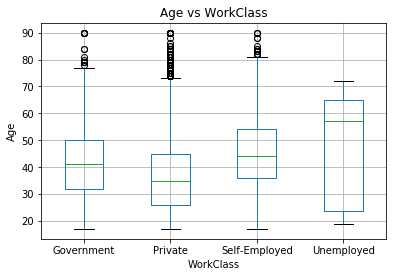

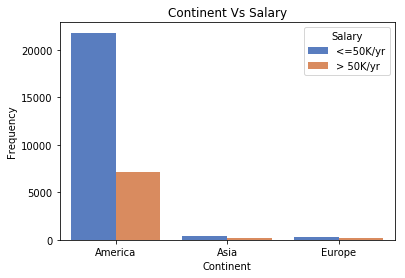

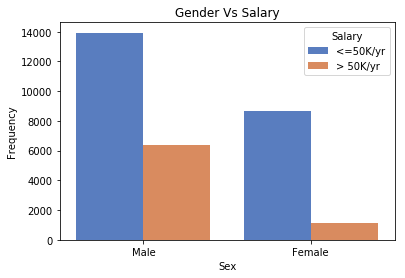

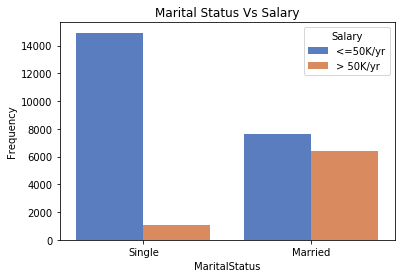

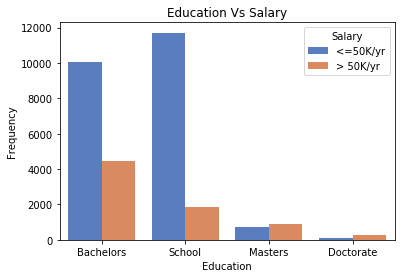

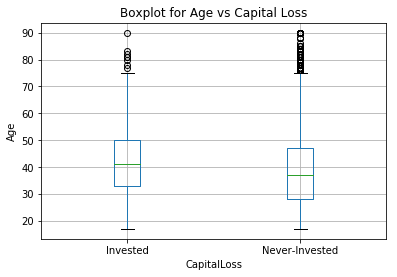

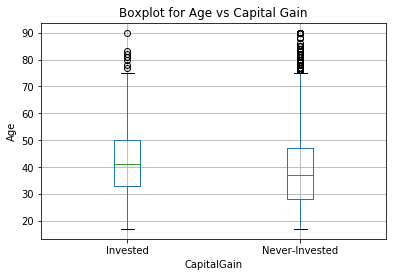

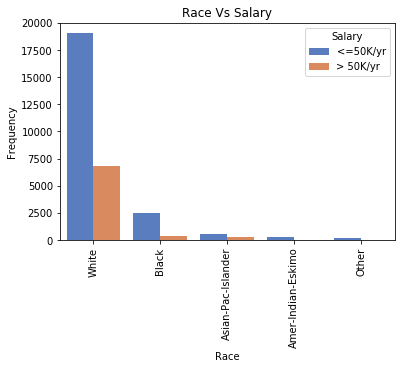

In [2]:
#Importing required library for Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#1
#Bar Plot for Working Class
adult['WorkClass'].value_counts().plot(kind = 'bar')
plt.title('Working Sector')
plt.ylabel('Number of adults')
plt.xlabel('WorkClass')
plt.show()

#2
#Pie Chart of Marital Status of Adults

labels = adult['MaritalStatus'].unique()
sizes = adult['MaritalStatus'].value_counts()
explode = (0, 0.2)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=True, startangle=45, pctdistance=1.3, labeldistance=0)
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("MaritalStatus")
plt.show()

#3
#Age histogram
adult['Age'].plot(kind = 'hist', color ='Pink',bins = 5)
plt.title('Age Distribution')
plt.xlabel('Age of adults')
plt.show()

#4
#Education Bar plot
adult['Education'].value_counts().plot(kind = 'bar', color ='Olive')
plt.ylabel('Number of Adults')
plt.xlabel('Education level')
plt.show()

#5
#Race Bar Plot
adult['Race'].value_counts().plot(kind = 'bar',color ='Orange')
plt.title('Different Race wise')
plt.ylabel('Adults Number')
plt.xlabel('Race')
plt.show()

#6
#Sex Pie Chart
labels = adult['Sex'].unique()
sizes = adult['Sex'].value_counts()
explode = (0, 0.2)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=True, startangle=45, pctdistance=1.3, labeldistance=0)
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Gender")
plt.show()


#7
#Bar plot of occupation
adult['Occupation'].value_counts().plot(kind = 'bar',color ='Black')
plt.title('Occupation Sector')
plt.ylabel('Number of Adults')
plt.xlabel(' Occupation')
plt.show()



#8
# Native Country
labels = adult['NativeCountry'].unique()
sizes = adult['NativeCountry'].value_counts()
explode = (0,0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=False, startangle=45, pctdistance=1.3, labeldistance=0,
        colors = ('lightgreen','orange','green'))
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Continent")
plt.show()

# 9
# Week hours
adult['Weekhrs'].plot(kind = 'hist', bins = 10,color ='green',histtype = 'step')
plt.title('Adult Working hours/per week')
plt.xlabel('Working hours')
plt.ylabel('Adult count')
plt.show()


#10
#Relationship Bar Plot
adult['Relationship'].value_counts().plot(kind = 'bar',color ='Blue')
plt.title('Based on Relationship ')
plt.ylabel('Number of Adults')
plt.xlabel('Relationship')
plt.show()


#11
#Salary Pie Chart 
labels = '> 50K/yr', '<=50K/yr'
sizes = adult['Sex'].value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow= False, startangle=45, pctdistance=1.3, labeldistance=0,
        colors = ('lightgreen','orange'))
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Salary")
plt.show()





#1
#Relationship between occupation and salary
graph1 = sns.countplot(y="Occupation", hue="Salary", data= adult, palette='pastel')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Occupation Vs Salary')
plt.xlabel('Frequency')
plt.show(graph1)


#2
#Relationship between workclass and salary
graph2 = sns.countplot(y= "WorkClass", hue= "Salary", data= adult, palette="Set2")
plt.legend(title = 'Salary', labels = ['<= 50K/yr','> 50K/yr'])
plt.title('WorkClass Vs Salary')
plt.xlabel('Frequency')
plt.show(graph2)

#3
#creating boxplot to visualize the relationship between Age and WorkClass
graph3 = adult.boxplot(column='Age',by='WorkClass')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Age vs WorkClass')
plt.show(graph3)

#4
# Relationship between Continents(Countries) and salary
graph4 = sns.countplot(x="NativeCountry", hue="Salary", data= adult,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Continent Vs Salary')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.show(graph4)

#5
#Relationship between Sex and salary
graph5 = sns.countplot(x="Sex", hue="Salary", data= adult,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Gender Vs Salary')
plt.ylabel('Frequency')
plt.show(graph5)

#6
#Relationship between Marital Status and salary
graph6 = sns.countplot(x="MaritalStatus", hue="Salary", data= adult,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Marital Status Vs Salary')
plt.show(graph6)

#7
#Relationship between Education and Salary
graph7 = sns.countplot(x="Education", hue="Salary", data= adult,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Education Vs Salary')
plt.show(graph7)


#8
temp_adult = adult.copy()
temp_adult['CapitalLoss'] = adult['CapitalLoss'].map({ 0 : "Never-Invested", 1: "Invested" })
#Boxplot between Age and CaptialLoss
graph8 = temp_adult.boxplot(column='Age',by='CapitalLoss')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Boxplot for Age vs Capital Loss')
plt.show(graph8)


#9
temp_adult['CapitalGain'] = adult['CapitalGain'].map({ 0 : "Never-Invested", 1: "Invested" })
#Creating Boxplot to visualize the relationship between Age and CaptialLoss
graph9 = temp_adult.boxplot(column='Age',by='CapitalGain')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Boxplot for Age vs Capital Gain')
plt.show(graph9)
#10
#Telationship between Race and salary
graph10 = sns.countplot(x="Race", hue="Salary", data= adult,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Race Vs Salary')
plt.xticks(rotation='vertical')
plt.show(graph10)


## Task 3-Data Modelling 

In [3]:
#Mapping Categorical Values to Numeric for the following attributes

adult['Sex'] = adult['Sex'].map({'Male':1,'Female':0})

map_relationship = {'Own-child':1,'Wife':1,'Husband':2,'Unmarried':3,'Not-in-family':4,'Other-relative':5}
adult['Relationship'] = adult['Relationship'].map(map_relationship)

map_race = {'Amer-Indian-Eskimo':0,'Asian-Pac-Islander':1, 'White':2,'Black':3,'Other':4 }
adult['Race']= adult['Race'].map(map_race)

adult['WorkClass'] = adult['WorkClass'].map({ "Private": 0, "Government": 1,"Self-Employed": 2,"Unemployed":3})
adult['MaritalStatus'] = adult['MaritalStatus'].map({ "Married": 0, "Single": 1})
adult['NativeCountry'] = adult['NativeCountry'].map({ "America": 0, "Asia": 1,"Europe":2})

map_occupation = {'Exec-managerial' : 0, 'Handlers-cleaners' : 1, 'Prof-specialty' : 2, 'Other-service' : 3, 
                  'Adm-clerical' : 4, 'Sales' : 5, 'Transport-moving' : 6, 'Farming-fishing' : 7,
                  'Machine-op-inspct' : 8, 'Tech-support' : 9, 'Craft-repair' : 10, 'Protective-serv' : 11,
                  'Armed-Forces' : 12, 'Priv-house-serv' : 13 }
adult['Occupation'] = adult['Occupation'].map(map_occupation)
                  
adult.drop(labels=['Education'],axis=1,inplace=True)
#Dropping FinalWeight as the data is irrelevant
adult.drop(labels=['FinalWeight'],axis=1,inplace=True)


In [4]:
salary_data = adult.iloc[:,0:12].values #Data for modeling
salary_target = adult.iloc[:,12:13].values #Target label variable
salary_target = salary_target.flatten() #reshaping
salary_data.shape
salary_target.shape

(30064L,)

In [5]:
#Importing libraries required for modelling
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#50% for training and 50% for testing
#With K =23 

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
#Shuffling the column selection 
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
#Creating For-Loop  from 0 to col_num


for cf in range(0, col_num):
    new_Ind.append(col_Ind_Random[cf])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.5, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cf])
    else:
        cur_MaxScore = cur_Score
        
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n" 
        print "Selected Index : " + str(new_Ind) + "\n"
        
        
print cm

print "Error Rate : " + str(round(error_rate,2)) + "\n"

 
acc3 = accuracy_score(y_test, y_pre) 
print  "Accuracy : " + str(round(acc3,2)) + "\n" 

print classification_report(y_test,y_pre)

Score with 1 selected features: 0.75345928685471

Selected Index : [7]

Score with 2 selected features: 0.7846593932943055

Selected Index : [7, 2]

Score with 3 selected features: 0.7849920170303353

Selected Index : [7, 2, 4]

Score with 4 selected features: 0.7946381053751995

Selected Index : [7, 2, 4, 8]

Score with 5 selected features: 0.8110697179350719

Selected Index : [7, 2, 4, 8, 3]

[[10343   983]
 [ 1857  1849]]
Error Rate : 0.19

Accuracy : 0.81

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     11326
           1       0.65      0.50      0.57      3706

   micro avg       0.81      0.81      0.81     15032
   macro avg       0.75      0.71      0.72     15032
weighted avg       0.80      0.81      0.80     15032



In [6]:
#Importing libraries required for modelling
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#With K =23
#60% for training and 40% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
#Shuffling the column selection 
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
#Creating For-Loop  from 0 to col_num


for cf in range(0, col_num):
    new_Ind.append(col_Ind_Random[cf])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cf])
    else:
        cur_MaxScore = cur_Score
        
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n" 
        print "Selected Index : " + str(new_Ind) + "\n"
        
        
print cm

print "Error Rate : " + str(round(error_rate,2)) + "\n"

 
acc3 = accuracy_score(y_test, y_pre) 
print  "Accuracy : " + str(round(acc3,2)) + "\n" 

print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7532013969732246

Selected Index : [7]

Score with 2 selected features: 0.7532013969732246

Selected Index : [7, 5]

Score with 3 selected features: 0.8121569931814402

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.8149010477299186

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8149010477299186

Selected Index : [7, 5, 2, 9, 8]

Score with 6 selected features: 0.817894561782804

Selected Index : [7, 5, 2, 9, 8, 3]

[[8416  642]
 [1548 1420]]
Error Rate : 0.18

Accuracy : 0.82

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      9058
           1       0.69      0.48      0.56      2968

   micro avg       0.82      0.82      0.82     12026
   macro avg       0.77      0.70      0.72     12026
weighted avg       0.81      0.82      0.81     12026



In [7]:
#Importing libraries required for modelling
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#With K =23
#80% for training and 20% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
#Shuffling the column selection 
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
#Creating For-Loop  from 0 to col_num


for cf in range(0, col_num):
    new_Ind.append(col_Ind_Random[cf])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.2, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cf])
    else:
        cur_MaxScore = cur_Score
        
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n" 
        print "Selected Index : " + str(new_Ind) + "\n"
        
        
print cm

print "Error Rate : " + str(round(error_rate,2)) + "\n"

 
acc3 = accuracy_score(y_test, y_pre) 
print  "Accuracy : " + str(round(acc3,2)) + "\n" 

print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7595210377515383

Selected Index : [7]

Score with 2 selected features: 0.7595210377515383

Selected Index : [7, 5]

Score with 3 selected features: 0.7991019457841344

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.7996008647929486

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8130716780309329

Selected Index : [7, 5, 2, 9, 11]

Score with 6 selected features: 0.8130716780309329

Selected Index : [7, 5, 2, 9, 11, 0]

Score with 7 selected features: 0.8167304174289041

Selected Index : [7, 5, 2, 9, 11, 0, 3]

[[4160  407]
 [ 695  751]]
Error Rate : 0.18

Accuracy : 0.82

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4567
           1       0.65      0.52      0.58      1446

   micro avg       0.82      0.82      0.82      6013
   macro avg       0.75      0.72      0.73      6013
weighted avg       0.81      0.82      0.81      6013

